# Pregunta 2

##### Generación del dataset

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# Convert the targets to one hot vectors
import keras
y_onehot = keras.utils.to_categorical(y_train)

##### Definición de la interfaz

In [17]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD


def evaluate_network_with_parameters(X, y, layers, epochs, lr, loss="mse"):
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation=layers[0]))
    model.add(Dense(16, activation=layers[1]))
    model.add(Dense(3, activation=layers[2]))
    model.compile(optimizer=SGD(lr=lr),loss=loss, metrics=["accuracy"])
    hist = model.fit(X_train, y, epochs=epochs, batch_size=1, verbose=0)
    return hist.history['acc'][-1]



##### Experimentos

In [18]:
import numpy as np
from timeit import default_timer as timer
# Definición del número de epochs a probar
epochs = np.arange(10, 1000, 50)

X = X_train
y = y_onehot

results = {
    "mse": {
        "sigmoid_sigmoid": {},
        "relu_relu": {},
        "sigmoid_relu": {},
        "relu_sigmoid": {},
    },
    "crossentropy" : {
        "sigmoid_sigmoid": {},
        "relu_relu": {},
        "sigmoid_relu": {},
        "relu_sigmoid": {},
    }
}

for loss in results:
    for activation_string in results[loss]:
        layers = activation_string.split("_")
        layers.append("softmax")
        
        results[loss][activation_string]["results"] = []
        results[loss][activation_string]["exec_time"] = []
        
        print("Evaluating", loss, layers[0], layers[1])
        for n in epochs:
            start = timer()
            accuracy = evaluate_network_with_parameters(X, y, layers, n, 0.1, loss="mse")
            end = timer()
            results[loss][activation_string]["results"].append(accuracy)
            results[loss][activation_string]["exec_time"].append(end - start)

Evaluating mse sigmoid sigmoid
Evaluating mse relu relu
Evaluating mse sigmoid relu
Evaluating mse relu sigmoid
Evaluating crossentropy sigmoid sigmoid
Evaluating crossentropy relu relu
Evaluating crossentropy sigmoid relu
Evaluating crossentropy relu sigmoid


##### Resultados

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:1506: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


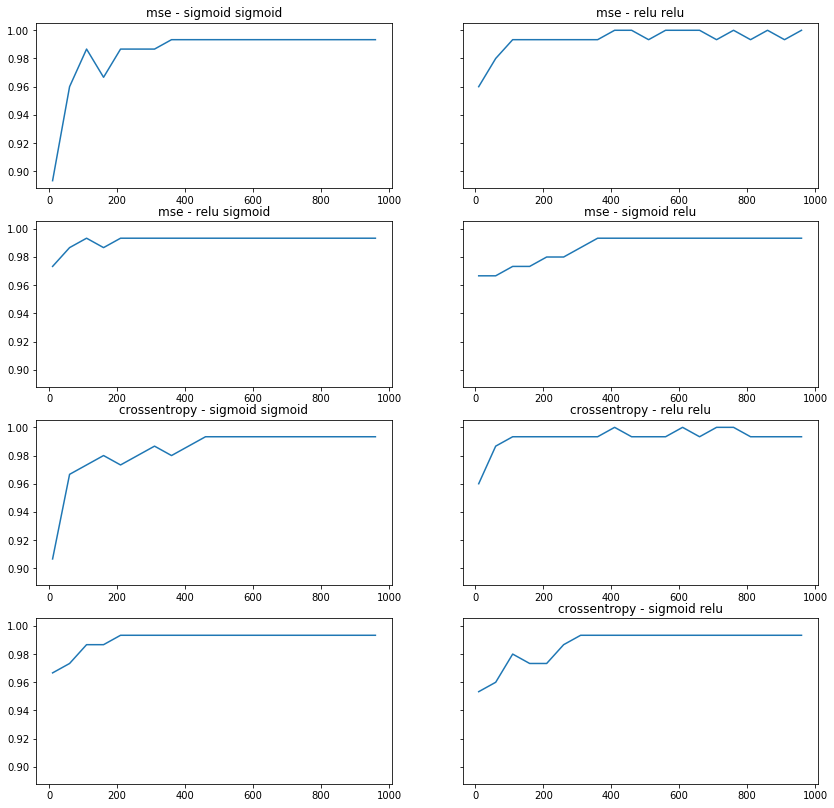

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 14), sharey=True)
fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

axes[0, 0].plot(epochs, results["mse"]["sigmoid_sigmoid"]["results"], label="Accuracy")
axes[0, 0].set_title("mse - sigmoid sigmoid")

axes[0, 1].plot(epochs, results["mse"]["relu_relu"]["results"], label="Accuracy")
axes[0, 1].set_title("mse - relu relu")

axes[1, 0].plot(epochs, results["mse"]["relu_sigmoid"]["results"], label="Accuracy")
axes[1, 0].set_title("mse - relu sigmoid")

axes[1, 1].plot(epochs, results["mse"]["sigmoid_relu"]["results"], label="Accuracy")
axes[1, 1].set_title("mse - sigmoid relu")

axes[2, 0].plot(epochs, results["crossentropy"]["sigmoid_sigmoid"]["results"], label="Accuracy")
axes[2, 0].set_title("crossentropy - sigmoid sigmoid")

axes[2, 1].plot(epochs, results["crossentropy"]["relu_relu"]["results"], label="Accuracy")
axes[2, 1].set_title("crossentropy - relu relu")


axes[3, 0].plot(epochs, results["crossentropy"]["relu_sigmoid"]["results"], label="Accuracy")
axes[3, 1].set_title("crossentropy - relu sigmoid")

axes[3, 1].plot(epochs, results["crossentropy"]["sigmoid_relu"]["results"], label="Accuracy")
axes[3, 1].set_title("crossentropy - sigmoid relu")


plt.show()

##### Matriz de confusión

A continuación se presenta la matriz de confusión para **mse** con capas escondidad con función **ReLU** para la activación y con un número de **500** epochs.

In [49]:
from sklearn.metrics import confusion_matrix

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.compile(optimizer=SGD(lr=0.1),loss="mse", metrics=["accuracy"])
hist = model.fit(X_train, y_onehot, epochs=500, batch_size=1, verbose=1)


Epoch 1/500
150/150 [==============================] - 3s 19ms/step - loss: 0.1160 - acc: 0.7733
Epoch 2/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0517 - acc: 0.9333
Epoch 3/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0315 - acc: 0.9467
Epoch 4/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0263 - acc: 0.9533
Epoch 5/500
150/150 [==============================] - 0s 1ms/step - loss: 0.0205 - acc: 0.9667
Epoch 6/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0176 - acc: 0.9733
Epoch 7/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0190 - acc: 0.9667
Epoch 8/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0168 - acc: 0.9600
Epoch 9/500
150/150 [==============================] - 0s 1ms/step - loss: 0.0197 - acc: 0.9600
Epoch 10/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0147 - acc: 0.9733
Epoch 11/500
150/150 [================

150/150 [==============================] - 0s 2ms/step - loss: 0.0078 - acc: 0.9867
Epoch 86/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0054 - acc: 0.9933
Epoch 87/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0069 - acc: 0.9867
Epoch 88/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0082 - acc: 0.9800
Epoch 89/500
150/150 [==============================] - 0s 1ms/step - loss: 0.0109 - acc: 0.9800
Epoch 90/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0063 - acc: 0.9933
Epoch 91/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0063 - acc: 0.9933
Epoch 92/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0064 - acc: 0.9933
Epoch 93/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0052 - acc: 0.9933
Epoch 94/500
150/150 [==============================] - 0s 1ms/step - loss: 0.0055 - acc: 0.9933
Epoch 95/500
150/150 [=====================

150/150 [==============================] - 0s 2ms/step - loss: 0.0044 - acc: 0.9933
Epoch 169/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 170/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 171/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 172/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 173/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0044 - acc: 0.9933
Epoch 174/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0044 - acc: 0.9933
Epoch 175/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0044 - acc: 0.9933
Epoch 176/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 177/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0044 - acc: 0.9933
Epoch 178/500
150/150 [===========

150/150 [==============================] - 0s 2ms/step - loss: 0.0035 - acc: 0.9933
Epoch 252/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0041 - acc: 0.9933
Epoch 253/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0031 - acc: 0.9933
Epoch 254/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0038 - acc: 0.9933
Epoch 255/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0074 - acc: 0.9867
Epoch 256/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0026 - acc: 0.9933
Epoch 257/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0053 - acc: 0.9867
Epoch 258/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0042 - acc: 0.9933
Epoch 259/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0035 - acc: 0.9933
Epoch 260/500
150/150 [==============================] - 0s 2ms/step - loss: 0.0033 - acc: 0.9933
Epoch 261/500
150/150 [===========

150/150 [==============================] - 0s 2ms/step - loss: 4.8646e-04 - acc: 1.0000
Epoch 334/500
150/150 [==============================] - 0s 2ms/step - loss: 5.7964e-04 - acc: 1.0000
Epoch 335/500
150/150 [==============================] - 0s 2ms/step - loss: 4.5148e-04 - acc: 1.0000
Epoch 336/500
150/150 [==============================] - 0s 2ms/step - loss: 6.7103e-04 - acc: 1.0000
Epoch 337/500
150/150 [==============================] - 0s 2ms/step - loss: 5.6242e-04 - acc: 1.0000
Epoch 338/500
150/150 [==============================] - 0s 2ms/step - loss: 4.3283e-04 - acc: 1.0000
Epoch 339/500
150/150 [==============================] - 0s 2ms/step - loss: 5.1821e-04 - acc: 1.0000
Epoch 340/500
150/150 [==============================] - 0s 2ms/step - loss: 3.8915e-04 - acc: 1.0000
Epoch 341/500
150/150 [==============================] - 0s 2ms/step - loss: 4.3371e-04 - acc: 1.0000
Epoch 342/500
150/150 [==============================] - 0s 2ms/step - loss: 3.9652e-04 - acc: 1

150/150 [==============================] - 0s 2ms/step - loss: 1.4224e-04 - acc: 1.0000
Epoch 414/500
150/150 [==============================] - 0s 2ms/step - loss: 1.3994e-04 - acc: 1.0000
Epoch 415/500
150/150 [==============================] - 0s 2ms/step - loss: 1.3599e-04 - acc: 1.0000
Epoch 416/500
150/150 [==============================] - 0s 2ms/step - loss: 1.1778e-04 - acc: 1.0000
Epoch 417/500
150/150 [==============================] - 0s 2ms/step - loss: 1.3771e-04 - acc: 1.0000
Epoch 418/500
150/150 [==============================] - 0s 1ms/step - loss: 1.3371e-04 - acc: 1.0000
Epoch 419/500
150/150 [==============================] - 0s 2ms/step - loss: 1.2027e-04 - acc: 1.0000
Epoch 420/500
150/150 [==============================] - 0s 2ms/step - loss: 1.2874e-04 - acc: 1.0000
Epoch 421/500
150/150 [==============================] - 0s 2ms/step - loss: 1.2736e-04 - acc: 1.0000
Epoch 422/500
150/150 [==============================] - 0s 2ms/step - loss: 1.2140e-04 - acc: 1

150/150 [==============================] - 0s 2ms/step - loss: 7.2229e-05 - acc: 1.0000
Epoch 493/500
150/150 [==============================] - 0s 2ms/step - loss: 7.0130e-05 - acc: 1.0000
Epoch 494/500
150/150 [==============================] - 0s 1ms/step - loss: 7.1258e-05 - acc: 1.0000
Epoch 495/500
150/150 [==============================] - 0s 1ms/step - loss: 7.3010e-05 - acc: 1.0000
Epoch 496/500
150/150 [==============================] - 0s 1ms/step - loss: 7.1086e-05 - acc: 1.0000
Epoch 497/500
150/150 [==============================] - 0s 2ms/step - loss: 6.9611e-05 - acc: 1.0000
Epoch 498/500
150/150 [==============================] - 0s 2ms/step - loss: 6.7505e-05 - acc: 1.0000
Epoch 499/500
150/150 [==============================] - 0s 2ms/step - loss: 6.8311e-05 - acc: 1.0000
Epoch 500/500
150/150 [==============================] - 0s 2ms/step - loss: 6.7657e-05 - acc: 1.0000


Confusion matrix, without normalization
[[50  0  0]
 [ 0 46  4]
 [ 0  0 50]]


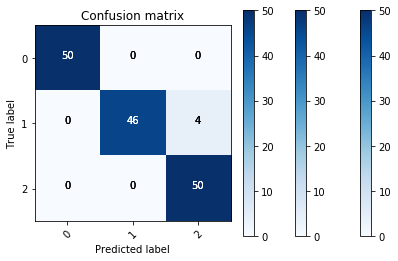

In [48]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def classify(x):
    return np.argmax(x)
    


y_pred = np.array(model.predict(np.array(X_train)))

y_hat = []

for y in y_pred:
    y_hat.append(classify(y))
    
y_hh = []

for y in y_onehot:
    y_hh.append(classify(y))
    
matrix = confusion_matrix(y_hh, y_hat)
plot_confusion_matrix(matrix, [0, 1, 2])

plt.show()

